In [1]:
import snapatac2 as snap
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
file_path = '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/RNA/2mo/SCTMat_050324_seu.mtx'

adata = sc.read_mtx(file_path)
adata

AnnData object with n_obs × n_vars = 72813 × 22858

In [3]:
meta = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/RNA/2mo/metadata_050324_seu.csv")
meta.index = meta["good_barcodes"]
meta.index.name = None
meta.shape

(72813, 15)

In [4]:
gene = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/RNA/2mo/gene_used_050324_seu.csv")
gene.head()
gene.index = gene["x"]
gene.index.name = None
gene.head()

,x
Gnai3,Gnai3
Pbsn,Pbsn
Cdc45,Cdc45
H19,H19
Scml2,Scml2


In [5]:
adata.obs = meta
adata.var = gene
adata

AnnData object with n_obs × n_vars = 72813 × 22858
    obs: 'lib', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'lib_groups', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'Annotation', 'L1', 'DNA', 'Prefix', 'good_prefix', 'good_barcodes'
    var: 'x'

In [6]:
del adata.var["x"]

In [7]:
raw_ad = sc.AnnData(adata.X)
raw_ad.obs_names, raw_ad.var_names = adata.obs_names, adata.var_names
adata.raw = raw_ad
adata

AnnData object with n_obs × n_vars = 72813 × 22858
    obs: 'lib', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'lib_groups', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'Annotation', 'L1', 'DNA', 'Prefix', 'good_prefix', 'good_barcodes'

In [8]:
adata.obs.head()

,lib,nCount_RNA,nFeature_RNA,percent.mt,lib_groups,nCount_SCT,nFeature_SCT,SCT_snn_res.0.3,seurat_clusters,Annotation,L1,DNA,Prefix,good_prefix,good_barcodes
01_A1:IB:03,DB240,1151,869,0.0,3,946,858,5,5,InN_CGE2,InN,DB232,1,1,01_A1:IB:03
01_A1:L1:03,DB240,489,416,0.0,3,493,416,9,9,VLMC,VLMC,DB232,1,1,01_A1:L1:03
01_A2:AE:04,DB240,671,522,0.0,4,669,522,1,1,ExN_L23,ExN,DB232,1,1,01_A2:AE:04
01_A2:BJ:03,DB240,326,290,0.0,3,412,291,7,7,OPC,OPC,DB232,1,1,01_A2:BJ:03
01_A2:C1:04,DB240,279,260,0.0,4,442,262,8,8,MiG_Inpp5d,MiG,DB232,1,1,01_A2:C1:04


In [9]:
pca_cor = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/RNA/2mo/PCA_cor_050324_seu.csv")
print(sum(pca_cor["barcodes"] == adata.obs.index))
print(pca_cor.shape)

0
(72813, 51)


In [10]:
pca_cor["barcodes"].head()

0    A1:IB:03_1
1    A1:L1:03_1
2    A2:AE:04_1
3    A2:BJ:03_1
4    A2:C1:04_1
Name: barcodes, dtype: object

In [11]:
pca = pca_cor.drop(columns = ["barcodes"])
pca = pca.to_numpy()
pca.shape

(72813, 50)

In [12]:
adata.obsm["X_pca"] = pca
adata

AnnData object with n_obs × n_vars = 72813 × 22858
    obs: 'lib', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'lib_groups', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'Annotation', 'L1', 'DNA', 'Prefix', 'good_prefix', 'good_barcodes'
    obsm: 'X_pca'

In [13]:
umap_cor = pd.read_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/RNA/2mo/UMAP_cor_050324_seu.csv")
umap_cor.head()

,UMAP_1,UMAP_2,barcodes
0,5.513649,1.668389,A1:IB:03_1
1,3.140533,-4.789125,A1:L1:03_1
2,-0.566577,5.455391,A2:AE:04_1
3,-4.687284,-9.103080,A2:BJ:03_1
4,-2.783027,-5.141187,A2:C1:04_1


In [14]:
sum(umap_cor["barcodes"] == adata.obs.index)

0

In [15]:
umap = umap_cor.drop(columns = ["barcodes"])
umap = umap.to_numpy()
adata.obsm["X_umap"] = umap
adata

AnnData object with n_obs × n_vars = 72813 × 22858
    obs: 'lib', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'lib_groups', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'Annotation', 'L1', 'DNA', 'Prefix', 'good_prefix', 'good_barcodes'
    obsm: 'X_pca', 'X_umap'

In [16]:
adata.var_names[0:5]

Index(['Gnai3', 'Pbsn', 'Cdc45', 'H19', 'Scml2'], dtype='object')

... storing 'lib' as categorical
... storing 'Annotation' as categorical
... storing 'L1' as categorical
... storing 'DNA' as categorical


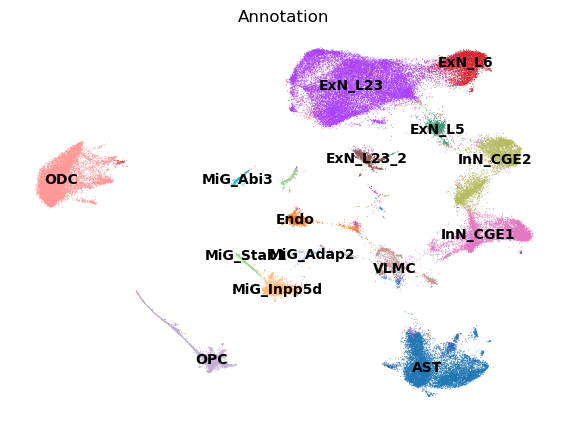

In [17]:
sc.pl.scatter(adata, basis='umap', color='Annotation', frameon=False, legend_loc = "on data")

In [18]:
adata

AnnData object with n_obs × n_vars = 72813 × 22858
    obs: 'lib', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'lib_groups', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'Annotation', 'L1', 'DNA', 'Prefix', 'good_prefix', 'good_barcodes'
    uns: 'Annotation_colors'
    obsm: 'X_pca', 'X_umap'

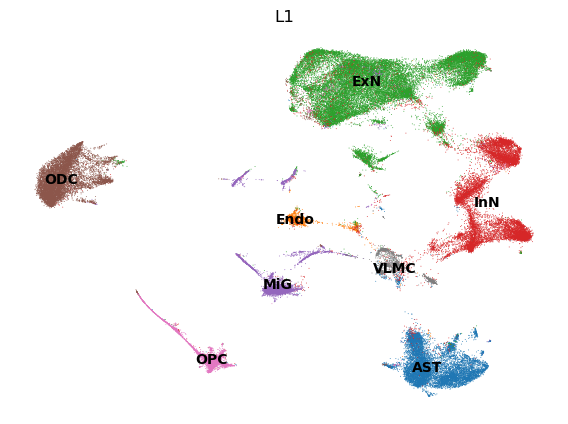

In [19]:
sc.pl.scatter(adata, basis='umap', color='L1', frameon=False, legend_loc = "on data")

In [20]:
sc.settings.set_figure_params(
    dpi=200, dpi_save=1000, figsize=(6, 5))
sc.settings.figdir = "/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/analysis/MouseBrain/DNA/Plots/"

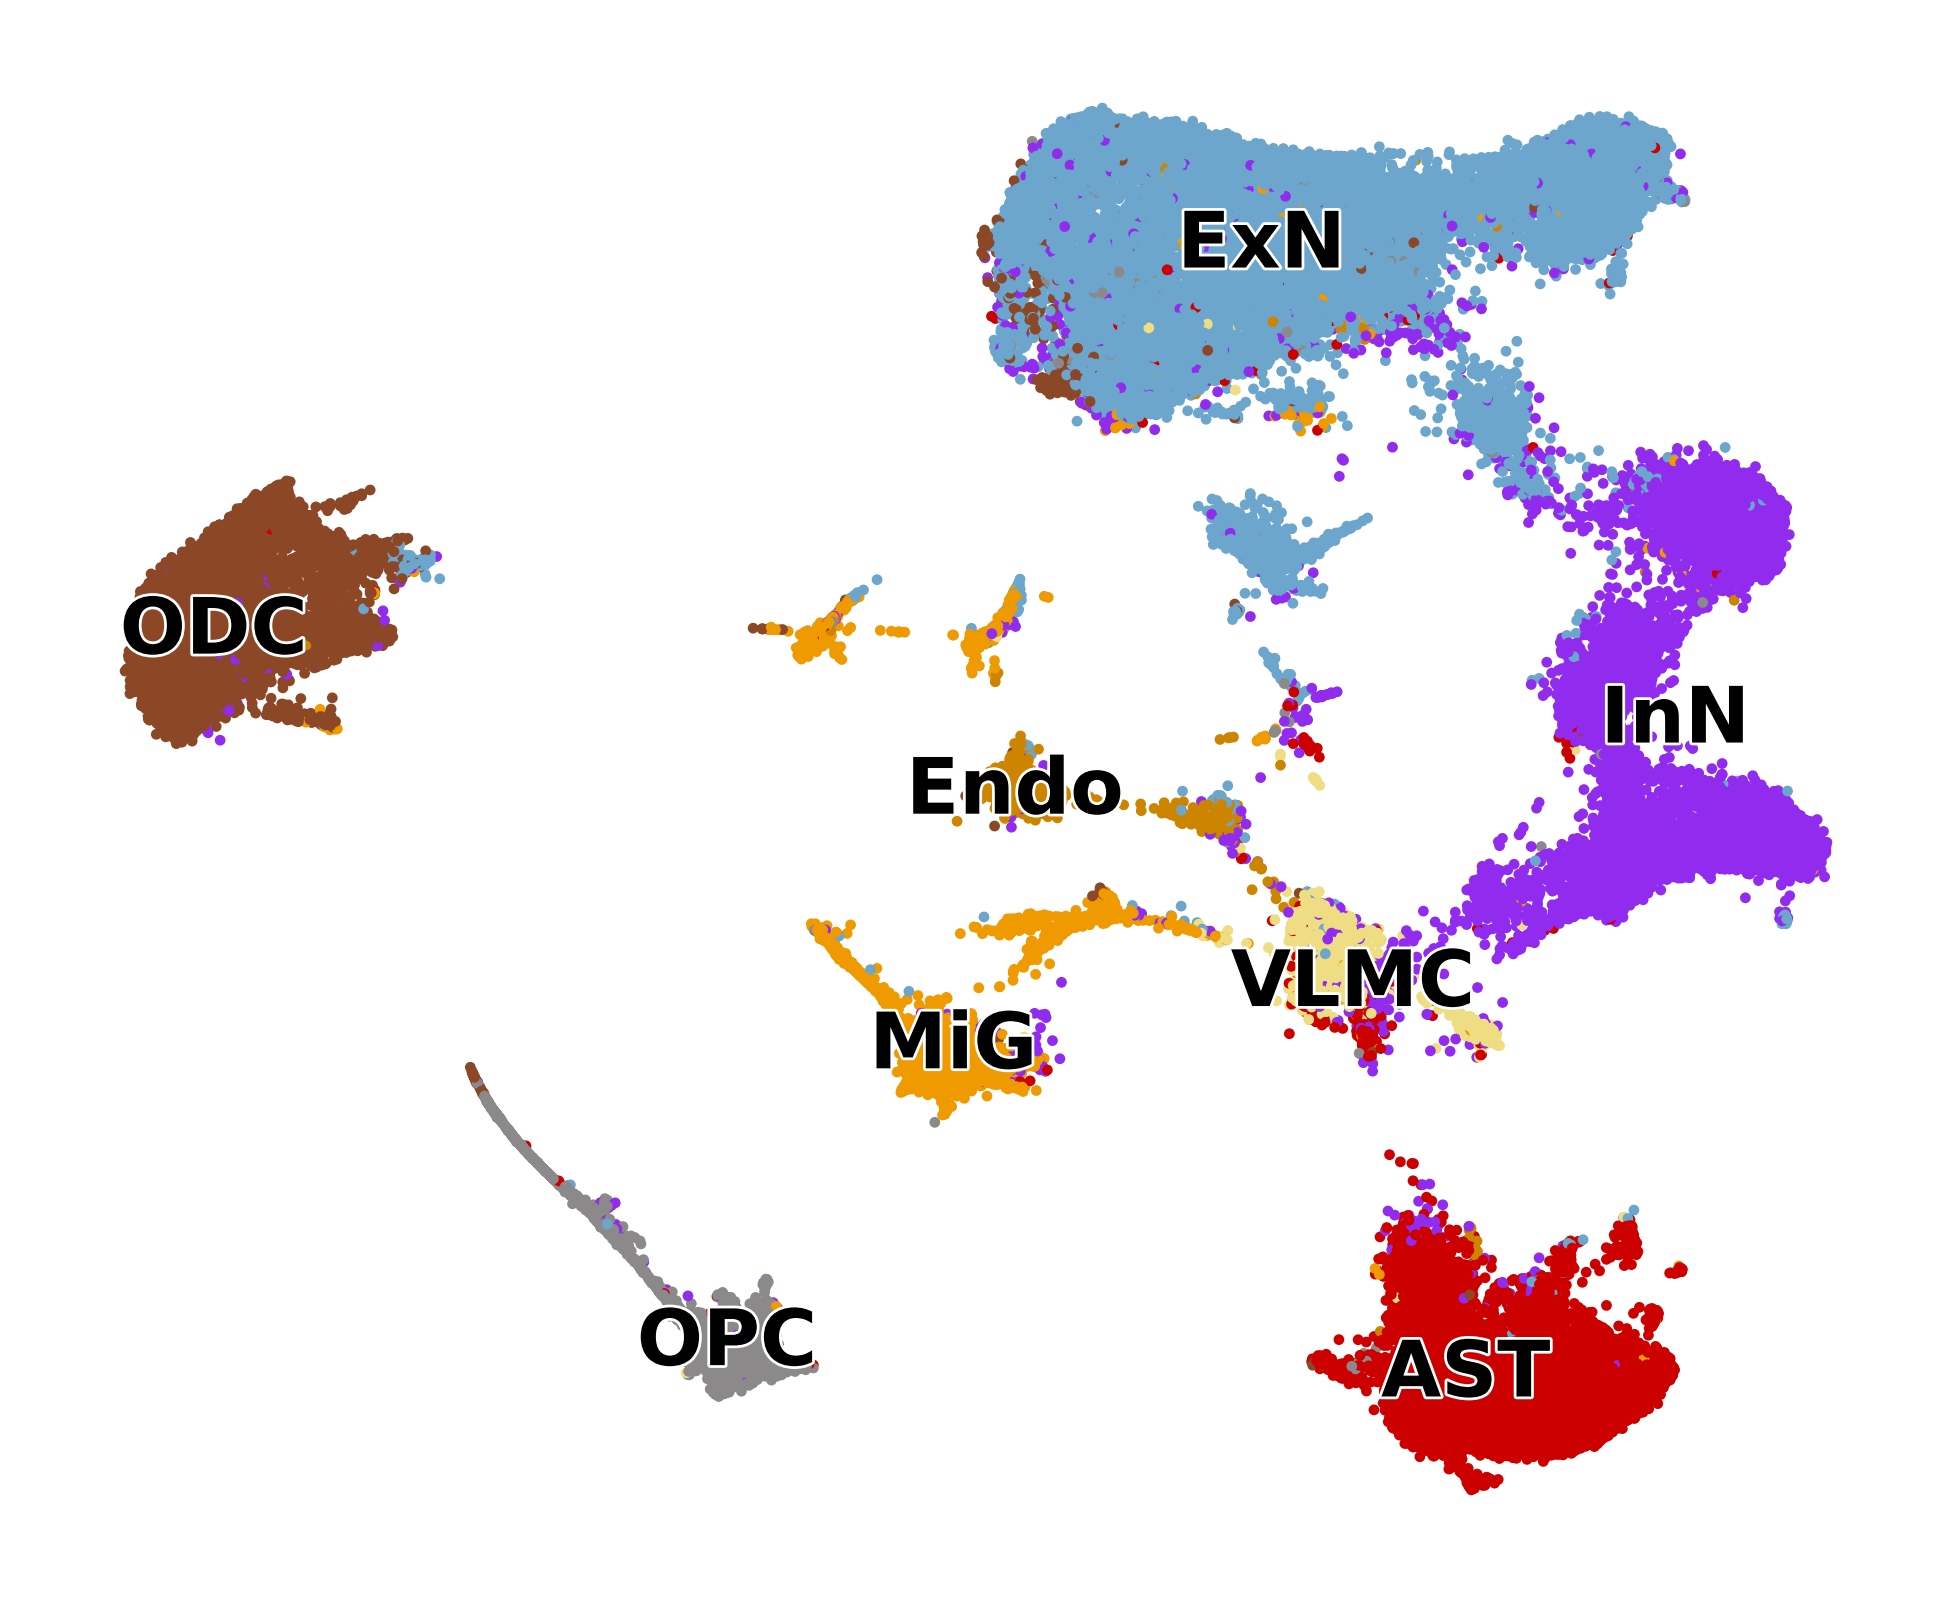

In [21]:
sc.pl.umap(adata, color = "L1", s=15, 
           palette = {
                'ExN': '#6CA6CD', 
                'InN': '#912CEE', 
                'Endo': '#CD8500', 
                'VLMC': '#EEDD82', 
                'MiG': '#EE9A00', 
                'AST': '#CD0000', 
                'ODC': '#8B4726', 
                'OPC': '#8B8989'},
        frameon=False, 
        legend_loc = "on data", 
        legend_fontoutline = True, 
        title = '', 
        add_outline = False, 
        save = True
          )

/gpfs/commons/home/zcao/.conda/envs/scpy/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


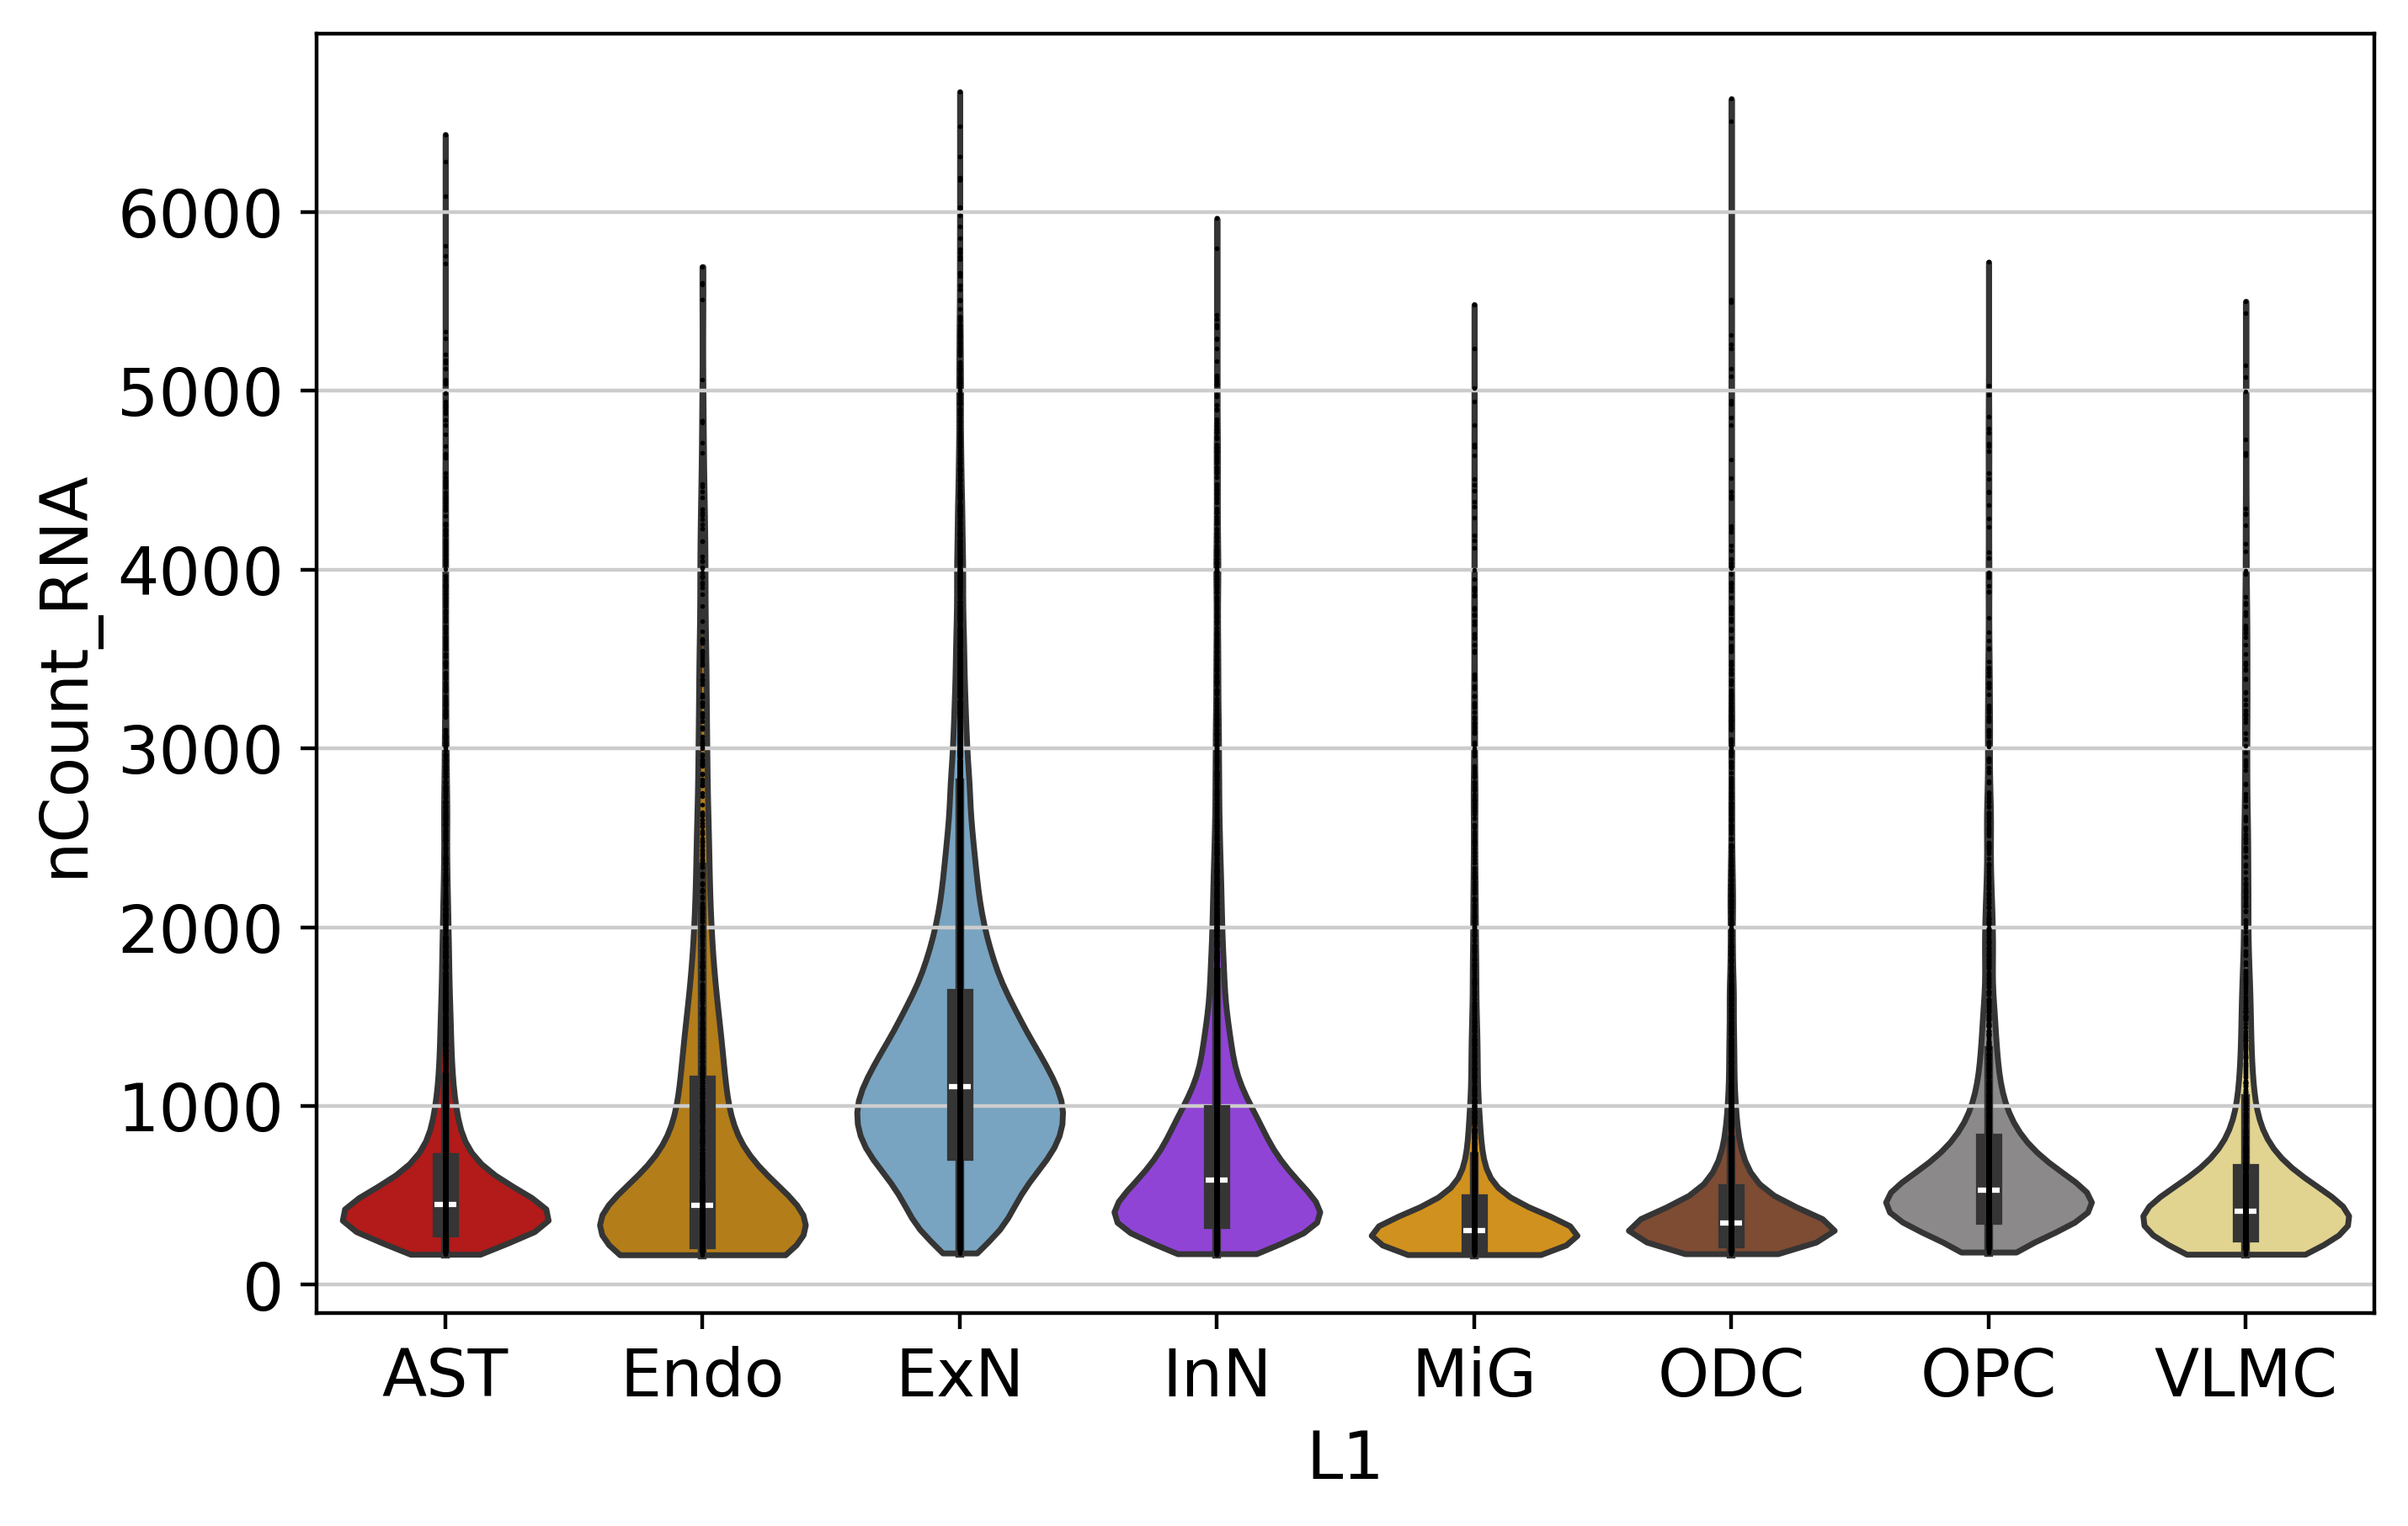

In [30]:
sc.settings.set_figure_params(
    dpi=200, dpi_save=1000, figsize=(7, 5))
sc.pl.violin(adata, "nCount_RNA", groupby = "L1", 
             palette = {
                'ExN': '#6CA6CD', 
                'InN': '#912CEE', 
                'Endo': '#CD8500', 
                'VLMC': '#EEDD82', 
                'MiG': '#EE9A00', 
                'AST': '#CD0000', 
                'ODC': '#8B4726', 
                'OPC': '#8B8989'},
                jitter = 0, 
                inner = "box", 
                save = "_RNA_UMI_L1.pdf"
            )

/gpfs/commons/home/zcao/.conda/envs/scpy/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


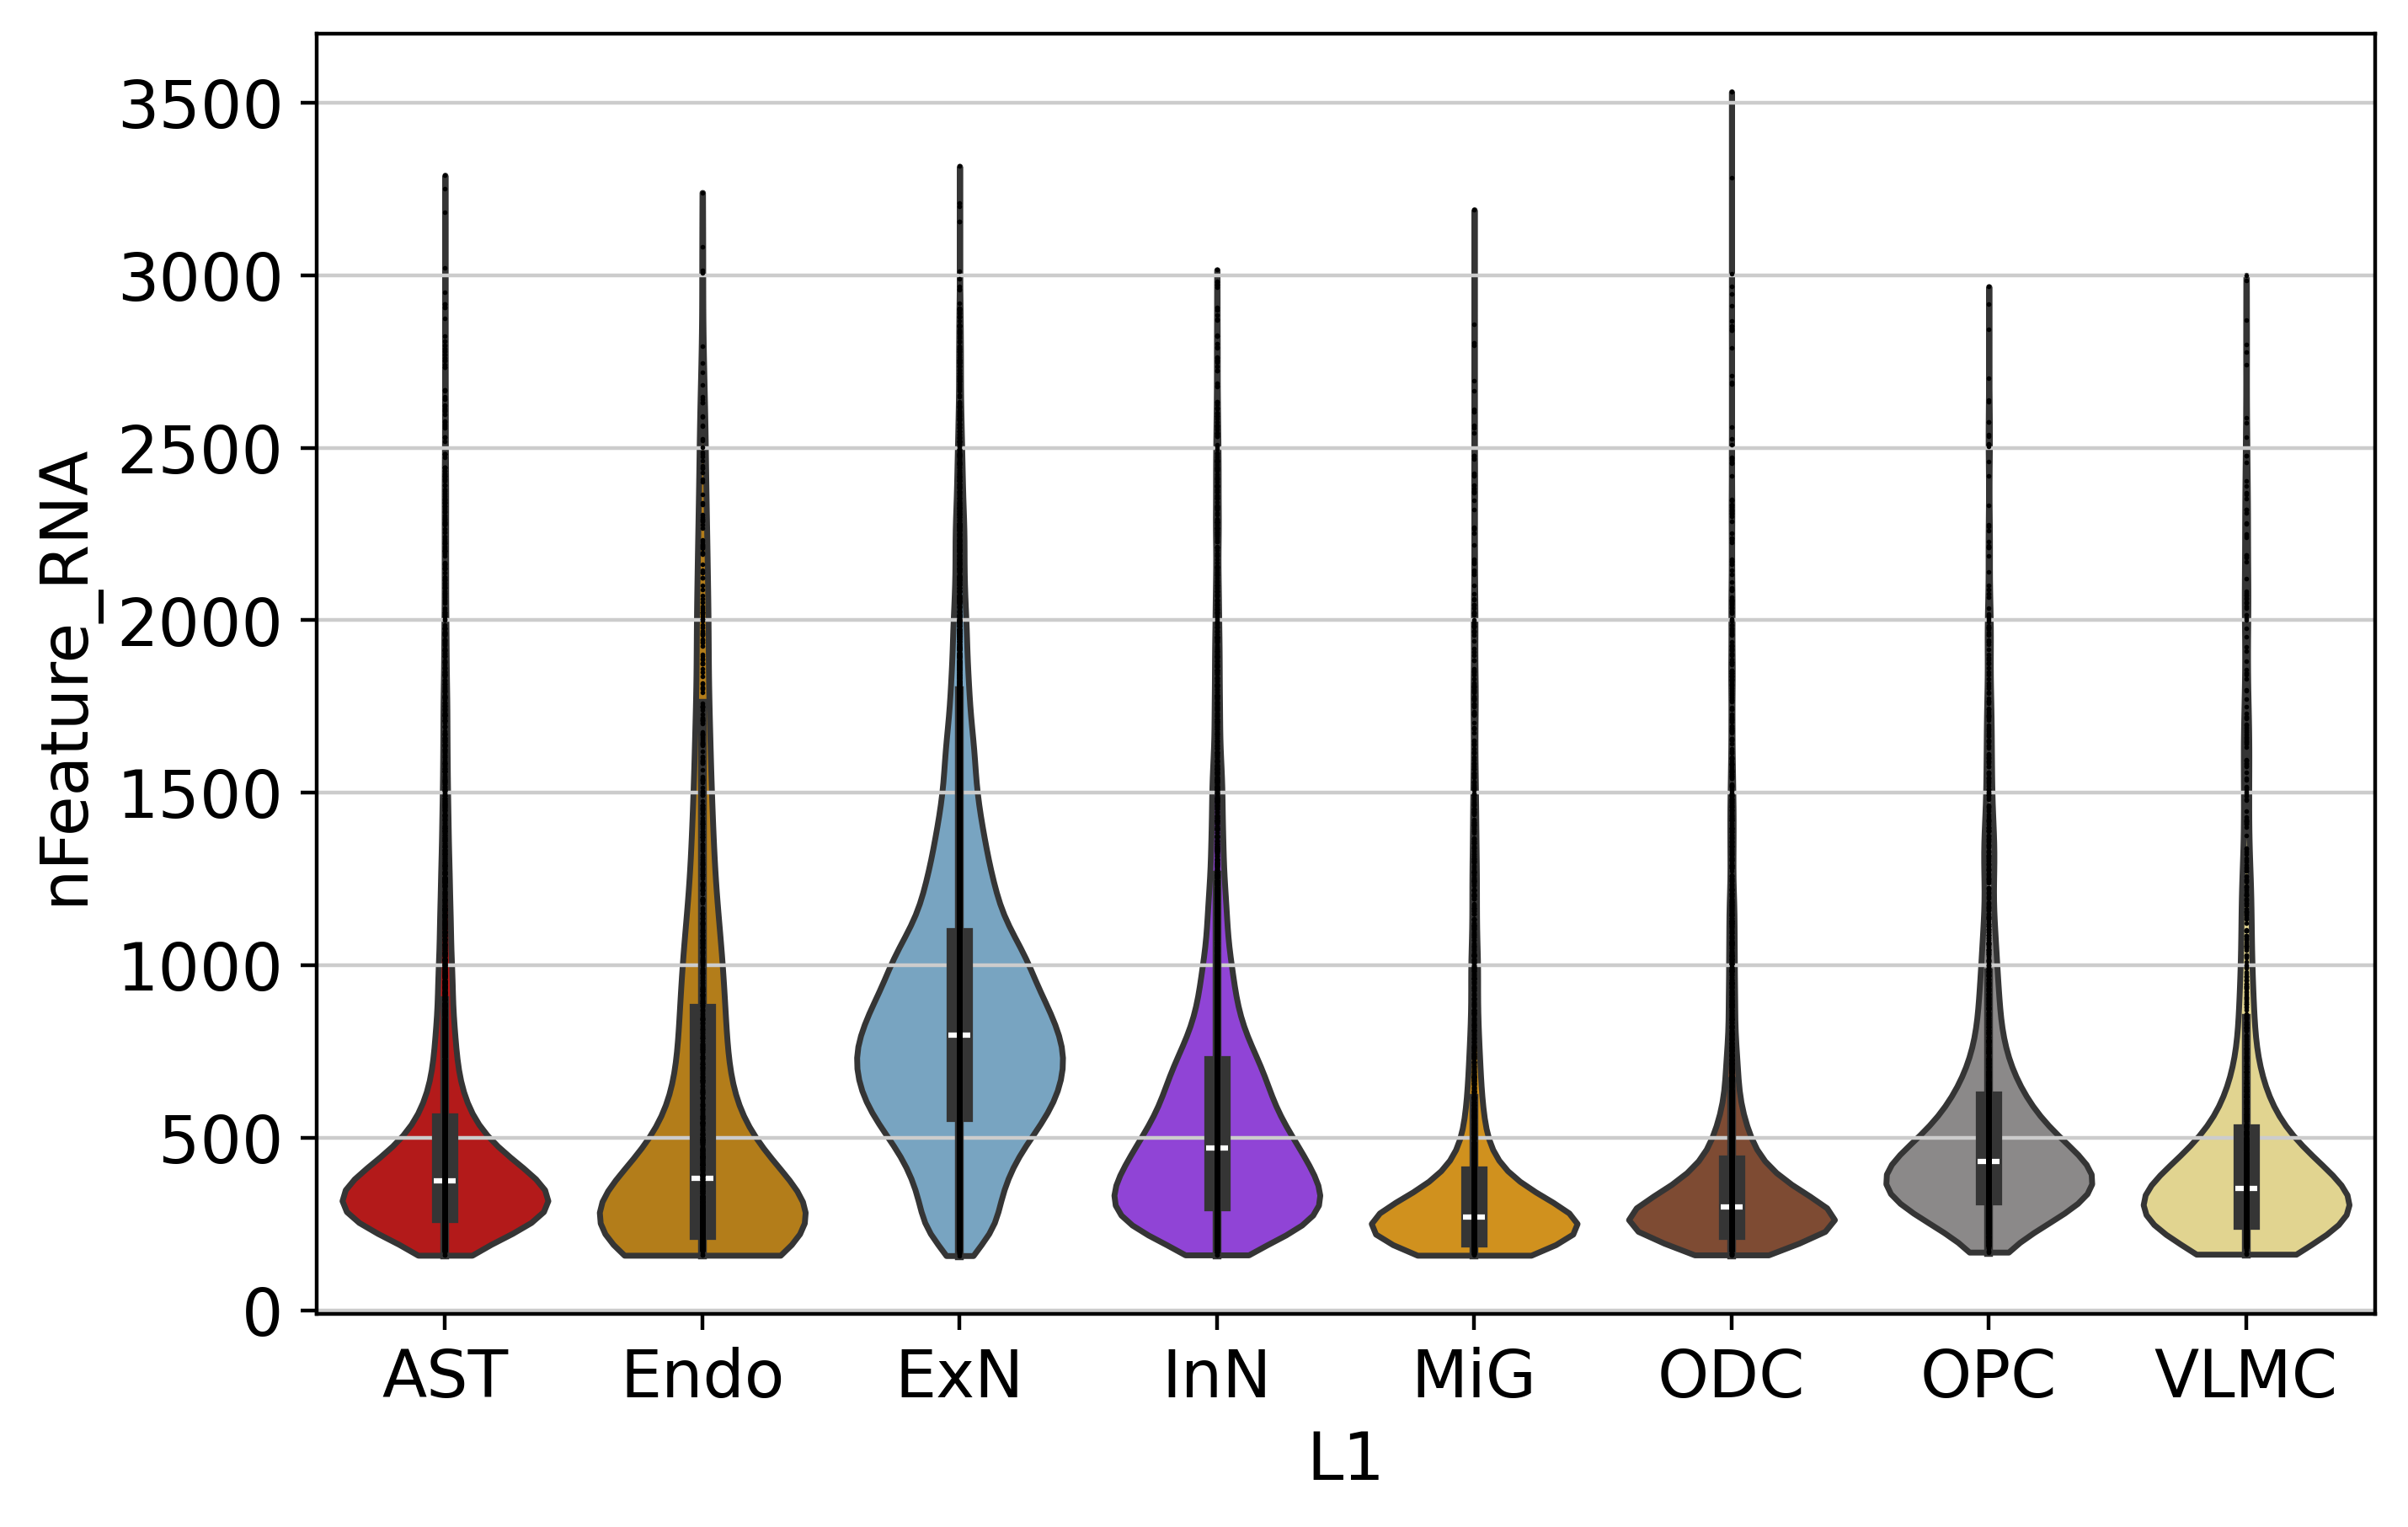

In [31]:
sc.pl.violin(adata, "nFeature_RNA", groupby = "L1", 
             palette = {
                'ExN': '#6CA6CD', 
                'InN': '#912CEE', 
                'Endo': '#CD8500', 
                'VLMC': '#EEDD82', 
                'MiG': '#EE9A00', 
                'AST': '#CD0000', 
                'ODC': '#8B4726', 
                'OPC': '#8B8989'},
                jitter = 0, 
                inner = "box", 
                save = "_RNA_nGene_L1.pdf"
            )

In [17]:
print(adata.obs["L1"].value_counts())
print(sum(adata.obs["L1"].isna()), "unannotated cells")

L1
ExN     26377
InN     13416
AST     11006
ODC      9913
MiG      5060
OPC      3603
VLMC     1901
Endo     1537
Name: count, dtype: int64
0 unannotated cells


In [18]:
adata.write("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/SCT_RNAraw_050424.h5ad")

In [3]:
#adata = sc.read_h5ad("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/SCT_RNAraw_050424.h5ad")

In [4]:
meta = adata.obs
meta.head()

,lib,nCount_RNA,nFeature_RNA,percent.mt,lib_groups,nCount_SCT,nFeature_SCT,SCT_snn_res.0.3,seurat_clusters,Annotation,L1,DNA,Prefix,good_prefix,good_barcodes
01_A1:IB:03,DB240,1151,869,0.0,3,946,858,5,5,InN_CGE2,InN,DB232,1,1,01_A1:IB:03
01_A1:L1:03,DB240,489,416,0.0,3,493,416,9,9,VLMC,VLMC,DB232,1,1,01_A1:L1:03
01_A2:AE:04,DB240,671,522,0.0,4,669,522,1,1,ExN_L23,ExN,DB232,1,1,01_A2:AE:04
01_A2:BJ:03,DB240,326,290,0.0,3,412,291,7,7,OPC,OPC,DB232,1,1,01_A2:BJ:03
01_A2:C1:04,DB240,279,260,0.0,4,442,262,8,8,MiG_Inpp5d,MiG,DB232,1,1,01_A2:C1:04


In [5]:
col_want = ["L1", "Annotation", "good_barcodes", "lib"]
meta = meta[col_want]
meta.to_csv("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/meta_wanted.csv")

In [6]:
sample_list = pd.read_table("/gpfs/commons/groups/zhu_lab/czhu/01.project_data/03.DNA_damage/11.Brain_dataset/sample_list.xls", 
                            sep="\t", header=0)
sample_list.head()

,DNA,RNA,Prefix
0,DB232,DB240,1
1,DB233,DB241,2
2,DB234,DB242,3
3,DB235,DB243,4
4,DB236,DB244,5


In [7]:
sample_list['Prefix'] = sample_list['Prefix'].astype(str).apply(lambda x: x.zfill(2))
sample_list.head()

,DNA,RNA,Prefix
0,DB232,DB240,01
1,DB233,DB241,02
2,DB234,DB242,03
3,DB235,DB243,04
4,DB236,DB244,05


In [8]:
barcodes = adata.obs_names
barcodes[0:5]

Index(['01_A1:IB:03', '01_A1:L1:03', '01_A2:AE:04', '01_A2:BJ:03',
       '01_A2:C1:04'],
      dtype='object')

In [9]:
DNA_lib = sample_list["DNA"].tolist()
obj_list = []
for lib in DNA_lib:
    file_path = "/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/snapATAC2_h5ad/MouseBrain_damage_{}.h5ad".format(lib)
    obj_list.append(file_path)

data_dirs = list(zip(DNA_lib, obj_list))
data_dirs[0:5]

[('DB232',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/snapATAC2_h5ad/MouseBrain_damage_DB232.h5ad'),
 ('DB233',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/snapATAC2_h5ad/MouseBrain_damage_DB233.h5ad'),
 ('DB234',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/snapATAC2_h5ad/MouseBrain_damage_DB234.h5ad'),
 ('DB235',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/snapATAC2_h5ad/MouseBrain_damage_DB235.h5ad'),
 ('DB236',
  '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/snapATAC2_h5ad/MouseBrain_damage_DB236.h5ad')]

In [10]:
damage = snap.AnnDataSet(data_dirs, filename = "/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/merged_h5ad/merged_050524.h5ad")
damage

AnnDataSet object with n_obs x n_vars = 150355 x 52685 backed at '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/merged_h5ad/merged_050524.h5ad'
contains 39 AnnData objects with keys: 'DB232', 'DB233', 'DB234', 'DB235', 'DB236', 'DB237', 'DB238', 'DB239', 'DB248', 'DB249', 'DB250', 'DB251', 'DB252', 'DB253', 'DB254', 'DB255', 'DB256', 'DB257', 'DB258', 'DB259', 'DB260', 'DB261', 'DB262', 'DB263', 'DB264', 'DB265', 'DB266', 'DB267', 'DB268', 'DB269', 'DB270', 'DB271', 'DB273', 'DB274', 'DB275', 'DB276', 'DB277', 'DB278', 'DB279'
    obs: 'sample'
    uns: 'AnnDataSet', 'reference_sequences'

In [11]:
intersection = set(adata.obs_names.to_list()).intersection(set(damage.obs_names))
intersection = list(intersection)
len(intersection)

72812

In [12]:
adata.obs_names.to_list()[0:5]

['01_A1:IB:03', '01_A1:L1:03', '01_A2:AE:04', '01_A2:BJ:03', '01_A2:C1:04']

In [13]:
damage.obs_names[1:5]

['01_A1:CR:10', '01_A1:D6:06', '01_A1:E5:12', '01_A1:EQ:03']

In [14]:
adata = adata[intersection, ]

In [15]:
adata.write("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/RNA_SCT_050524.h5ad")

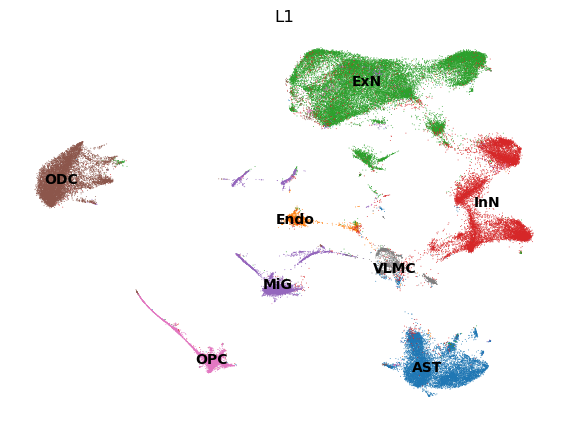

In [16]:
sc.pl.scatter(adata, basis='umap', color='L1', legend_loc = "on data", frameon=False)

In [17]:
damage.subset(obs_indices = intersection, out = "/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/")

(AnnDataSet object with n_obs x n_vars = 72812 x 52685 backed at '/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/_dataset.h5ads'
 contains 39 AnnData objects with keys: 'DB232', 'DB233', 'DB234', 'DB235', 'DB236', 'DB237', 'DB238', 'DB239', 'DB248', 'DB249', 'DB250', 'DB251', 'DB252', 'DB253', 'DB254', 'DB255', 'DB256', 'DB257', 'DB258', 'DB259', 'DB260', 'DB261', 'DB262', 'DB263', 'DB264', 'DB265', 'DB266', 'DB267', 'DB268', 'DB269', 'DB270', 'DB271', 'DB273', 'DB274', 'DB275', 'DB276', 'DB277', 'DB278', 'DB279'
     obs: 'sample'
     uns: 'AnnDataSet', 'reference_sequences',
 [7,
  168,
  180,
  225,
  269,
  274,
  280,
  285,
  328,
  445,
  489,
  555,
  557,
  561,
  586,
  591,
  599,
  635,
  720,
  783,
  994,
  1007,
  1016,
  1023,
  1051,
  1096,
  1157,
  1190,
  1213,
  1231,
  1256,
  1314,
  1351,
  1376,
  1448,
  1468,
  1519,
  1550,
  1570,
  1656,
  1688,
  1707,
  1716,
  1753,
  1887,
  1890,
  1896,
  1906,
  2018,
  2020,
  2060

In [18]:
damage = snap.read_dataset("/gpfs/commons/groups/zhu_lab/zcao/Paired_damage/data/MouseBrain/Joint_FinalObj/_dataset.h5ads")

In [19]:
meta = meta.loc[damage.obs_names]

In [20]:
damage.obs["L1"] = meta["L1"]

In [21]:
damage.obs["Annotation"] = meta["Annotation"]

In [22]:
damage.close()

In [24]:
damage

Closed AnnDataSet object

In [ ]:
damage.obs = temp

In [41]:
damage.close()